#Desafio de Classificação: Diagnóstico de Alzheimer com Dados Cognitivos

1. Faça uma análise exploratória dos dados e identifique os principais
preditores da variável Group.Trate valores ausentes, codifique
variáveis categóricas e normalize os dados, se necessário.

2. Treine um modelo de classificação (Regressão Logística, Árvore de
Decisão ou Random Forest).

3. Avalie o modelo utilizando:
- Matriz de confusão
- Acurácia
- Precisão
- Revocação (Recall)
- F1-score (opcional, mas recomendado)

4. Qual a importância relativa de cada variável no modelo final?

5. O modelo apresenta bom desempenho em ambos os grupos (com e
sem demência)?

6. É possível identificar pacientes em estágio inicial de demência com
esse modelo?

7. O modelo apresenta overfitting ou underfitting? Como isso pode ser
ajustado?

# Com Random Forest

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Carregar os dados
df = pd.read_csv("dados_alzheimer_classificacao.csv")

# Ver primeiras linhas
df.head()

,Age,Sex,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,66,M,19,5,21,1.0,1474,0.768,1.11,0
1,79,M,14,5,22,2.0,1630,0.722,0.82,0
2,88,M,8,5,22,0.0,1432,0.668,1.24,1
3,74,M,14,3,24,1.0,1276,0.833,1.29,0
4,70,M,18,4,25,0.0,1605,0.677,1.28,0


In [ ]:
# Informações gerais
print(df.info())

# Verificar valores ausentes
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     200 non-null    int64  
 1   Sex     200 non-null    object 
 2   EDUC    200 non-null    int64  
 3   SES     200 non-null    int64  
 4   MMSE    200 non-null    int64  
 5   CDR     200 non-null    float64
 6   eTIV    200 non-null    int64  
 7   nWBV    200 non-null    float64
 8   ASF     200 non-null    float64
 9   Group   200 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 15.8+ KB
None
Age      0
Sex      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Group    0
dtype: int64


In [ ]:
# Codificar variáveis categóricas
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})

# Separar variáveis preditoras e alvo
X = df.drop(columns=['Group']) # todas as colunas, menos a variável alvo.
y = df['Group'] # Target (0 = sem demência, 1 = com demência)

In [ ]:
# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y) # 70% Treino, 30% Teste

In [ ]:
# Treinar modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)


Matriz de Confusão:


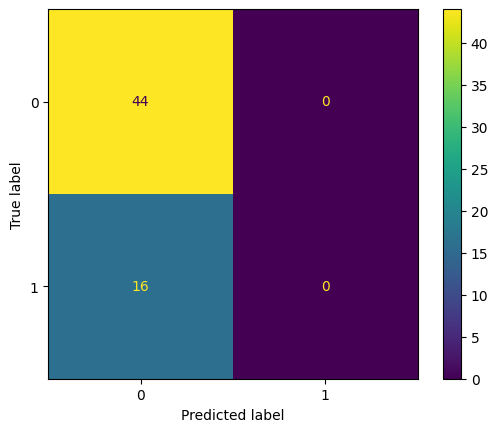


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        44
           1       0.00      0.00      0.00        16

    accuracy                           0.73        60
   macro avg       0.37      0.50      0.42        60
weighted avg       0.54      0.73      0.62        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Avaliação do modelo
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

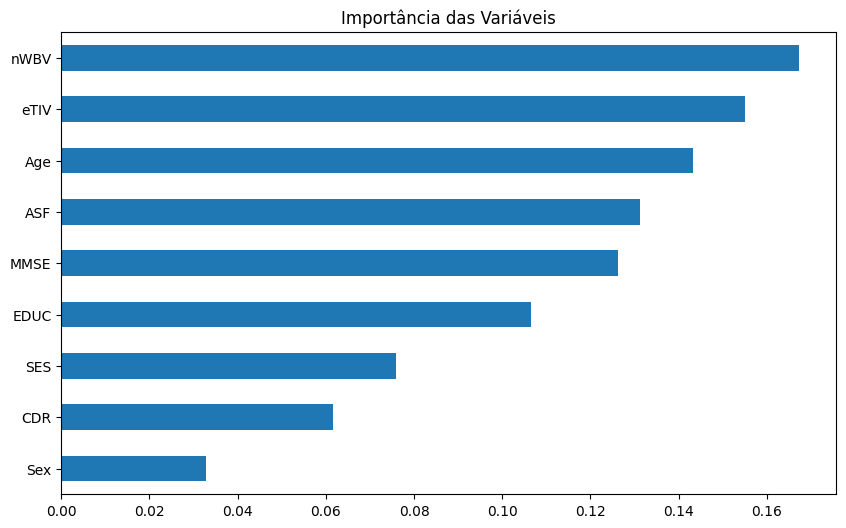

In [ ]:
# Importância das variáveis
importances = pd.Series(model.feature_importances_, index=df.drop(columns=['Group']).columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Importância das Variáveis")
plt.show()

# Com Regressão Logística

Matriz de Confusão:


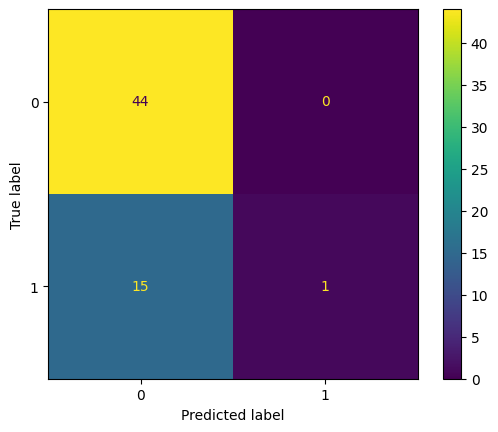


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      1.00      0.85        44
           1       1.00      0.06      0.12        16

    accuracy                           0.75        60
   macro avg       0.87      0.53      0.49        60
weighted avg       0.81      0.75      0.66        60


Acurácia com Validação Cruzada:
Scores: [0.7   0.75  0.725 0.7   0.75 ]
Média: 0.725 | Desvio padrão: 0.022360679774997918


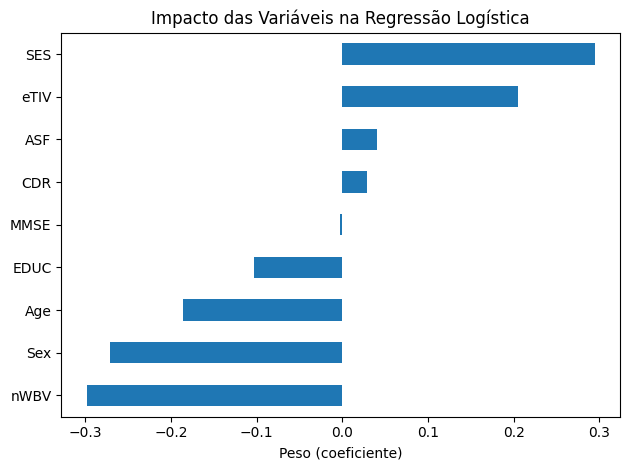

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv("dados_alzheimer_classificacao.csv")

# Verificar e tratar valores nulos (não existem, mas deixamos como precaução)
df.fillna(df.median(numeric_only=True), inplace=True)

# Codificar a variável categórica 'Sex'
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})

# Separar preditores e alvo
X = df.drop(columns=['Group'])
y = df['Group']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Criar e treinar o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar desempenho
print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Validação cruzada para verificar overfitting
scores = cross_val_score(model, X_scaled, y, cv=5)
print("\nAcurácia com Validação Cruzada:")
print("Scores:", scores)
print("Média:", np.mean(scores), "| Desvio padrão:", np.std(scores))

# Coeficientes e importância das variáveis
coefficients = pd.Series(model.coef_[0], index=df.drop(columns=['Group']).columns)
coefficients.sort_values().plot(kind='barh', title='Impacto das Variáveis na Regressão Logística')
plt.xlabel('Peso (coeficiente)')
plt.tight_layout()
plt.show()
